In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
data = pd.read_csv('./data/1.2/behavior.csv', sep = ',',encoding = 'utf-8')

# （1）PV/UV相关

### 每日PV/UV

In [2]:
#PV
se = data.groupby(['date'])['浏览'].sum()
se

date
2014-11-18    395982
2014-11-19    405103
2014-11-20    392599
2014-11-21    372570
2014-11-22    390638
2014-11-23    428205
2014-11-24    420721
2014-11-25    403631
2014-11-26    397048
2014-11-27    404786
2014-11-28    383756
2014-11-29    398341
2014-11-30    438904
2014-12-01    435448
2014-12-02    440729
2014-12-03    457803
2014-12-04    431818
2014-12-05    400873
2014-12-06    455632
2014-12-07    478213
2014-12-08    481243
2014-12-09    494873
2014-12-10    510422
2014-12-11    612238
2014-12-12    833019
2014-12-13    494372
2014-12-14    500450
2014-12-15    489105
2014-12-16    476857
2014-12-17    468700
2014-12-18    459362
Name: 浏览, dtype: int64

In [3]:
df1 = se.to_frame()  #se为Series，需要转换为dataframe
df1

,浏览
date,
2014-11-18,395982
2014-11-19,405103
2014-11-20,392599
2014-11-21,372570
2014-11-22,390638
2014-11-23,428205
2014-11-24,420721
2014-11-25,403631
2014-11-26,397048


In [4]:
df1.reset_index(inplace=True)  #索引date转为列
df1

,date,浏览
0,2014-11-18,395982
1,2014-11-19,405103
2,2014-11-20,392599
3,2014-11-21,372570
4,2014-11-22,390638
5,2014-11-23,428205
6,2014-11-24,420721
7,2014-11-25,403631
8,2014-11-26,397048
9,2014-11-27,404786


In [5]:
df1.reset_index(level=0, inplace=True)  #索引date转为列
df1

,index,date,浏览
0,0,2014-11-18,395982
1,1,2014-11-19,405103
2,2,2014-11-20,392599
3,3,2014-11-21,372570
4,4,2014-11-22,390638
5,5,2014-11-23,428205
6,6,2014-11-24,420721
7,7,2014-11-25,403631
8,8,2014-11-26,397048
9,9,2014-11-27,404786


In [6]:
#UV
data1 = data[['用户','date']]
data1.drop_duplicates(inplace = True)
se = data1.groupby(['date'])['用户'].count()
df2 = se.to_frame()  #se为Series，需要转换为dataframe
df2.reset_index(level=0, inplace=True)  #索引date转为列

C:\Users\lb\AppData\Local\Temp\ipykernel_10716\532047585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop_duplicates(inplace = True)


In [7]:
#合并df1、df2
df = pd.merge(df1,df2,how='outer',on='date')
df

,index,date,浏览,用户
0,0,2014-11-18,395982,12534
1,1,2014-11-19,405103,12597
2,2,2014-11-20,392599,12525
3,3,2014-11-21,372570,12298
4,4,2014-11-22,390638,12175
5,5,2014-11-23,428205,12610
6,6,2014-11-24,420721,12750
7,7,2014-11-25,403631,12570
8,8,2014-11-26,397048,12435
9,9,2014-11-27,404786,12373


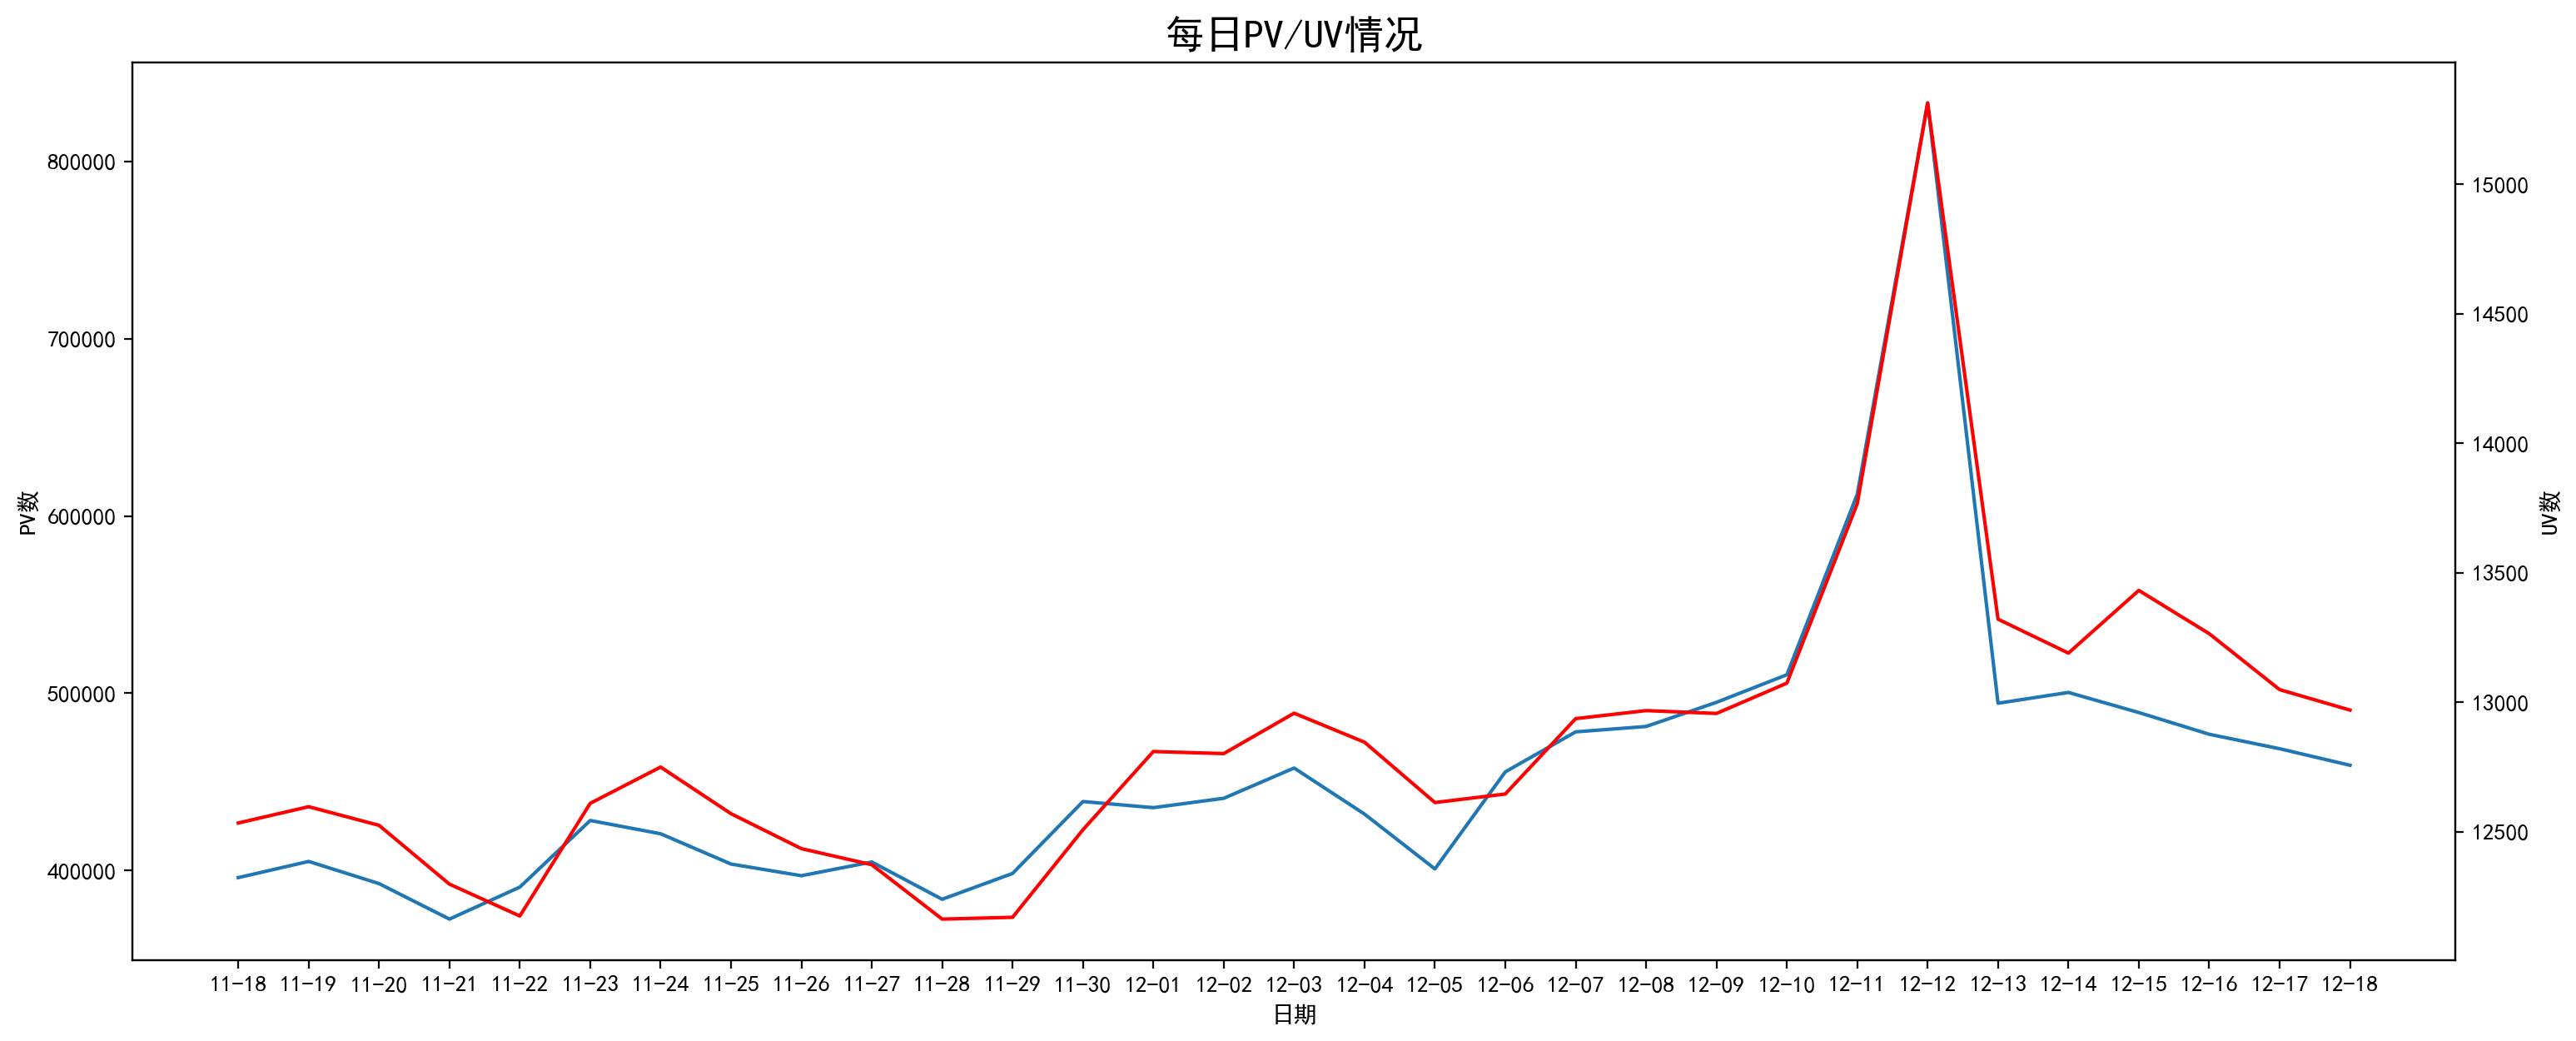

In [8]:
#画图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
x1 = df['date'].str[5:10]
y1 = df['浏览']
y2 = df['用户']
fig = plt.figure(figsize=(18, 7),dpi=200) 
plt.xlabel('日期')
plt.plot(x1,y1)  #折线图
plt.ylabel('PV数')
plt.twinx()
plt.plot(x1,y2,'r')  #折线图
plt.ylabel('UV数')
plt.title('每日PV/UV情况',fontsize='xx-large',fontweight='bold')
plt.show()

### 时段PV

In [9]:
se = data.groupby(['hour'])['浏览'].sum()
df3 = se.to_frame()  #se为Series，需要转换为dataframe
df3.reset_index(level=0, inplace=True)  #索引date转为列

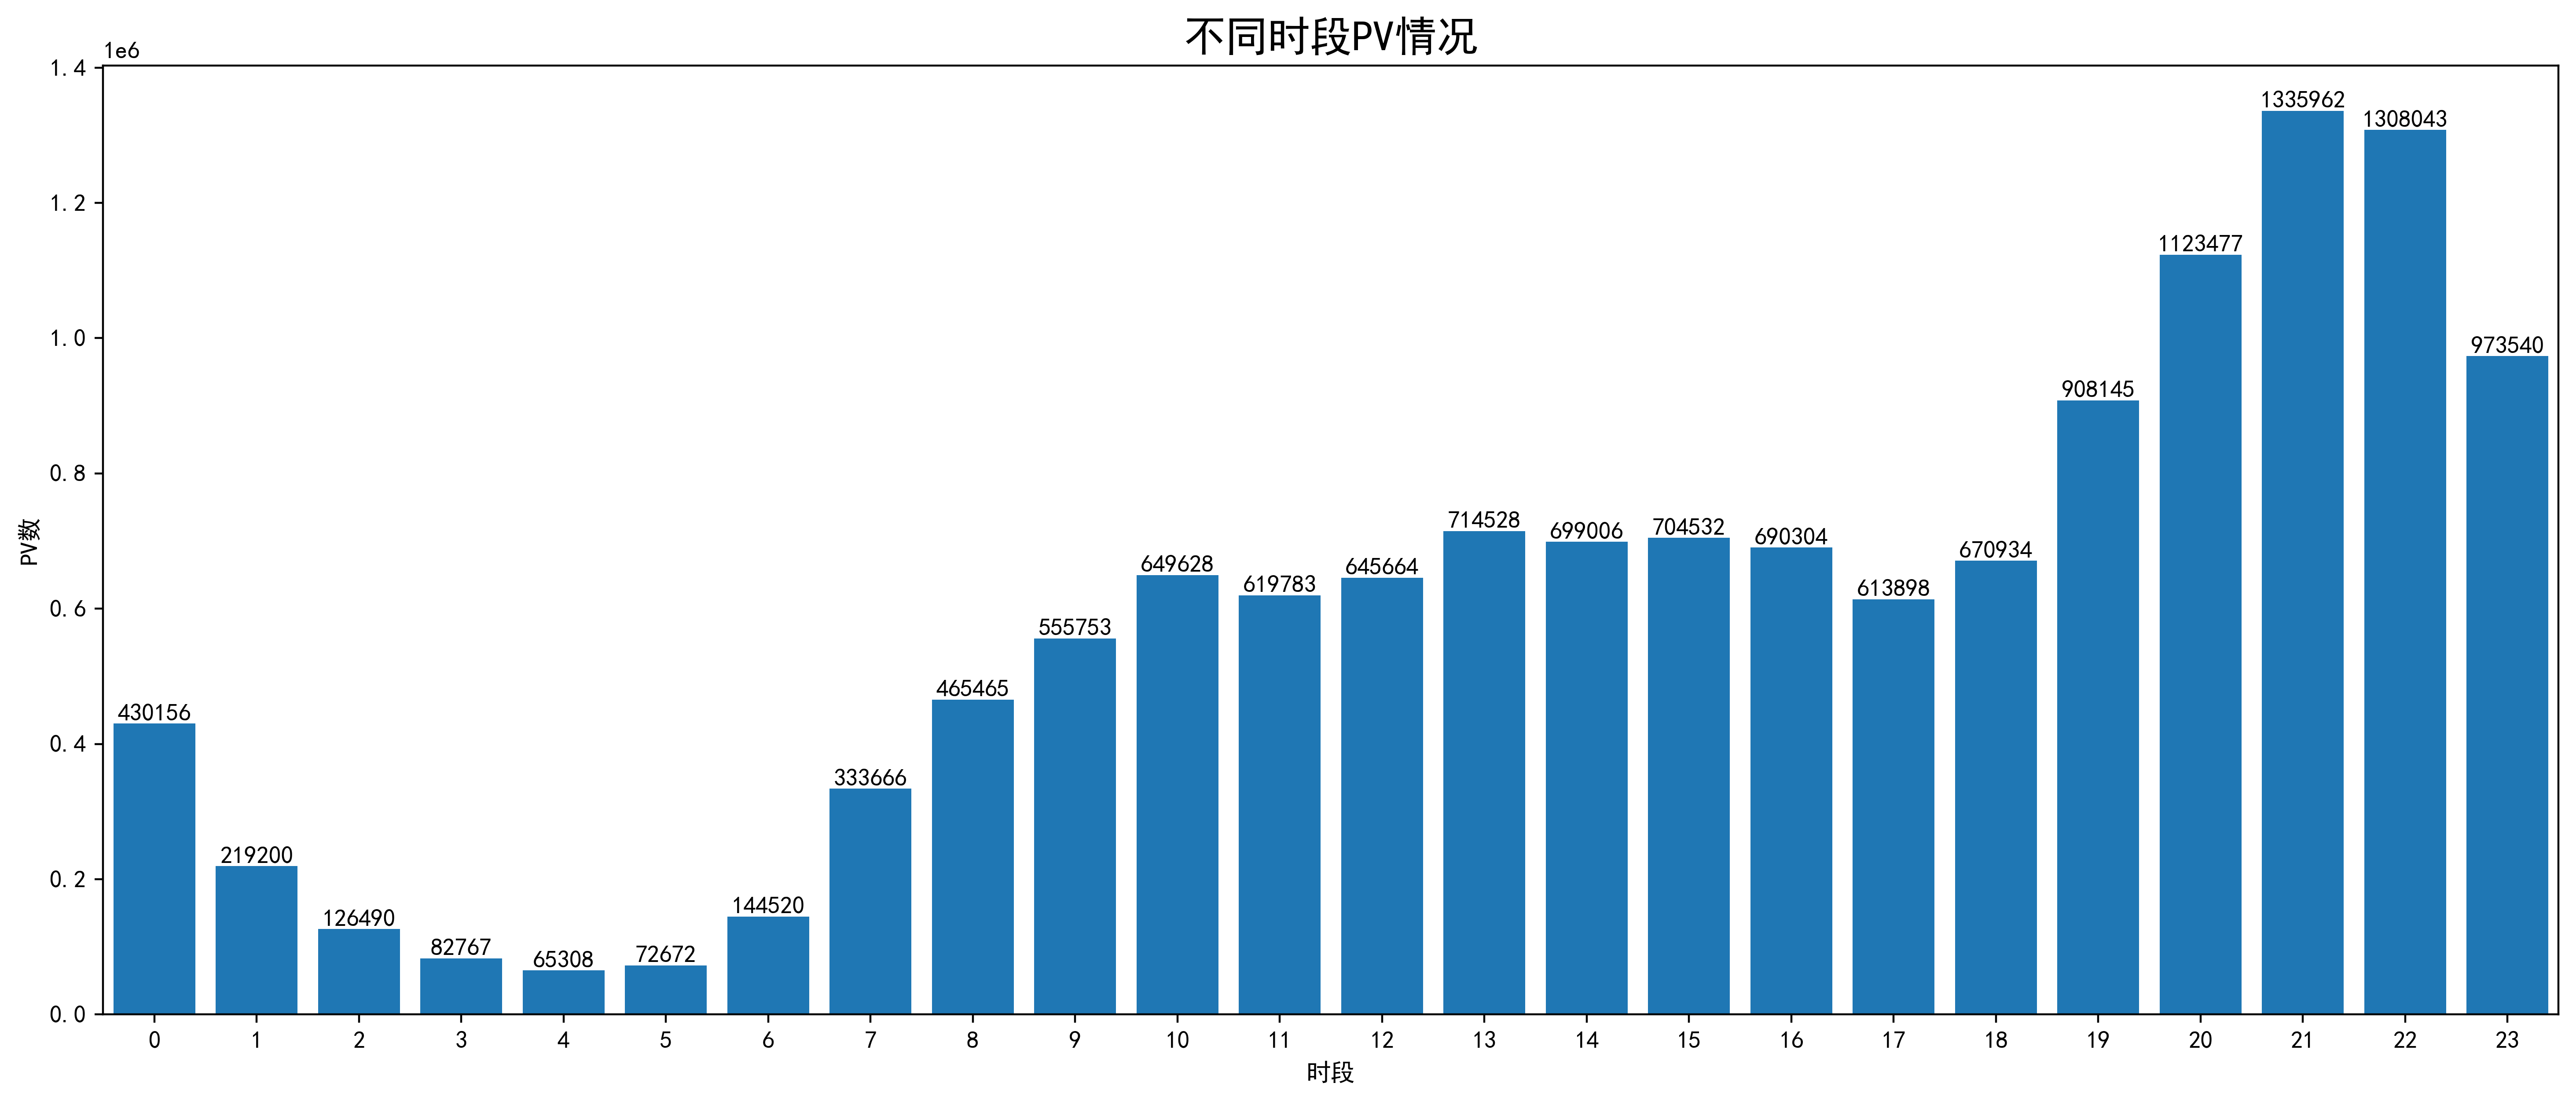

In [10]:
x1 = df3['hour']
y1 = df3['浏览']
fig = plt.figure(figsize=(18, 7),dpi=400) 
plt.bar(x1,y1)
plt.xlabel('时段')
plt.ylabel('PV数')
plt.title('不同时段PV情况',fontsize='xx-large',fontweight='bold')
ax = plt.gca() #ax为两条坐标轴的实例
from matplotlib.pyplot import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(1)) #把x轴的主刻度设置为1的倍数
plt.xlim(-0.5,23.5) #设置x轴的刻度范围
for a,b in zip(x1,y1):   #设置数值标签
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.show()

# （2）商品相关

### 品类统计

In [11]:
se = data.groupby(['品类'])['购买'].sum()
df4 = se.to_frame()  #se为Series，需要转换为dataframe
df4.reset_index(level=0, inplace=True)  #索引date转为列
df4.sort_values(by='购买',inplace=True,ascending=False)

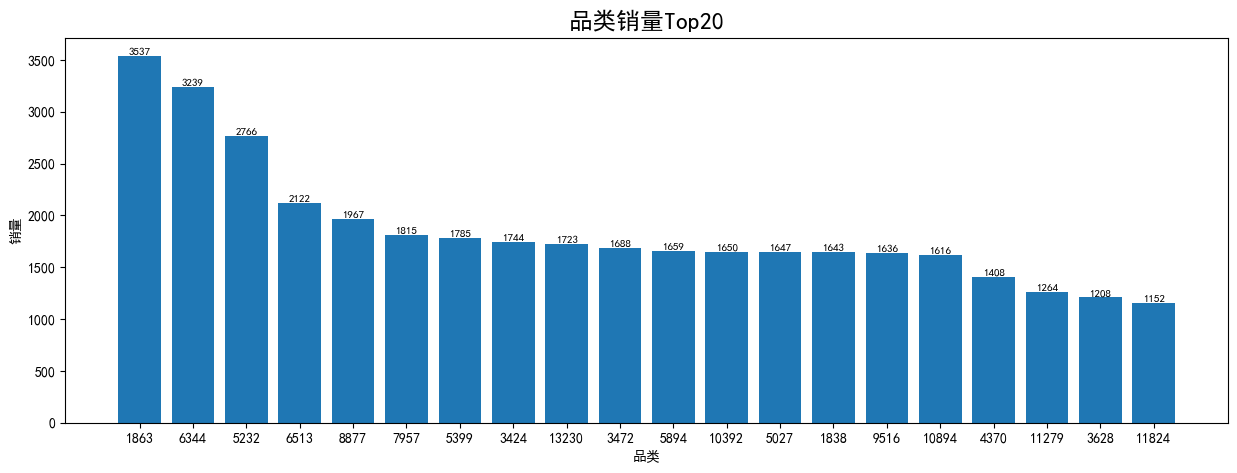

In [12]:
x1 = df4['品类'][0:20].apply(str) #apply(str)的作用是将int64转为字符串
y1 = df4['购买'][0:20]
fig = plt.figure(figsize=(15, 5))

plt.bar(x1,y1)
plt.xlabel('品类')
plt.ylabel('销量')
plt.title('品类销量Top20',fontsize='xx-large',fontweight='bold')
for a,b in zip(x1,y1):   #设置数值标签
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=8)
plt.show()

### 商品销售情况

In [13]:
se = data.groupby(['商品'])['购买'].sum()
df6 = se.to_frame()  #se为Series，需要转换为dataframe
df6.reset_index(level=0, inplace=True)  #索引date转为列
df6.sort_values(by='购买',inplace=True,ascending=False)

In [14]:
n1 = df6[df6['购买']==0]['商品'].count()
print('未销售商品数：',n1)

未销售商品数： 4588033


In [15]:
n2 = df6[df6['购买']==1]['商品'].count()
print('销售1件商品数：',n2)

销售1件商品数： 147117


In [16]:
n3 = df6[df6['购买']<=5]['商品'].count()-n1-n2
print('销售2-5件商品数：',n3)

销售2-5件商品数： 21838


In [17]:
n4 = df6[df6['购买']<=10]['商品'].count()-n1-n2-n3
print('销售6-10件商品数：',n4)

销售6-10件商品数： 1215


In [18]:
n5 = df6[df6['购买']<=20]['商品'].count()-n1-n2-n3-n4
print('销售11-20件商品数：',n5)

销售11-20件商品数： 231


In [19]:
n6 = df6[df6['购买']>20]['商品'].count()
print('销售大于20件商品数：',n6)

销售大于20件商品数： 50


# （3）消费者相关

### 消费者在线情况

In [20]:
se = data1.groupby(['用户'])['date'].count()

In [21]:
df5 = se.to_frame()  #se为Series，需要转换为dataframe
df5.reset_index(level=0, inplace=True)  #索引date转为列
df5

,用户,date
0,492,14
1,3726,17
2,19137,7
3,36465,8
4,37101,23
...,...,...
19995,142427508,18
19996,142432272,27
19997,142439559,3
19998,142440276,8


In [22]:
df5.rename(columns={'date':'在线天数'},inplace=True)   
df5.sort_values(by='在线天数',inplace=True,ascending=False)
df5

,用户,在线天数
11194,62189225,31
833,4641860,31
9204,51859808,31
1235,10095384,31
11958,100937545,31
...,...,...
515,3043882,1
6625,38085425,1
15978,121670681,1
6679,38386877,1


In [23]:
m1 = df5[df5['在线天数'] <= 6]['用户'].count()
m2 = df5[df5['在线天数'] <= 11]['用户'].count()-m1
m3 = df5[df5['在线天数'] <= 16]['用户'].count()-m1-m2
m4 = df5[df5['在线天数'] <= 21]['用户'].count()-m1-m2-m3
m5 = df5[df5['在线天数'] <= 26]['用户'].count()-m1-m2-m3-m4
m6 = df5['用户'].count()-m1-m2-m3-m4-m5

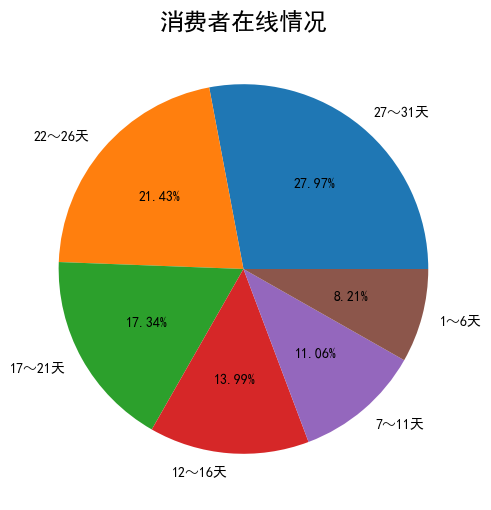

In [24]:
label = [u"27～31天",u"22～26天",u"17～21天",u"12～16天",u"7～11天",u"1～6天"]
fractions = [m6,m5,m4,m3,m2,m1]
fig = plt.figure(figsize=(6, 6))
plt.pie(fractions,labels=label,autopct='%1.2f%%')
plt.title('消费者在线情况',fontsize='xx-large',fontweight='bold')
plt.show()